In [4]:
import numpy as np
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap

$$
Z = \left(\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right)
\qquad
Z_0Z_1 = \left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right)
$$

$$U_{\Phi(\vec{x})}=\exp \left(i [x_1 Z_1+x_2 Z_2+(\pi-x_1)(\pi-x_2) Z_1Z_2]\right)=\exp \left(i x_1 Z_1\right)*\exp \left(i x_2 Z_2\right)*\exp \left(i (\pi-x_1)(\pi-x_2) Z_1Z_2\right)$$

$$P(\lambda)=\left(\begin{array}{cc}
1 & 0 \\
0 & e^{i \lambda}
\end{array}\right)
\qquad 
P(-2\lambda)=\left(\begin{array}{cc}
1 & 0 \\
0 & e^{-i 2\lambda}
\end{array}\right)
=e^{-i \lambda}*\left(\begin{array}{cc}
e^{i \lambda} & 0 \\
0 & e^{-i \lambda}
\end{array}\right)
$$

$$
 \exp \left(i x_0 Z_0\right) = \left(\begin{array}{cc}
e^{i x_0} & 0 \\
0 & -e^{-i x_0}
\end{array}\right)
= e^{i x_0}*P(-2x_0)
\qquad \exp \left(i x_1 Z_1\right) = \left(\begin{array}{cc}
e^{i x_1} & 0 \\
0 & -e^{-i x_1}
\end{array}\right)
= e^{i x_1}*P(-2x_1)
$$

$$Z_0Z_1 = \left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{array}\right)
\qquad
e^{i \lambda Z_0 Z_1}=\left(\begin{array}{cccc}
e^{i \lambda} & 0 & 0 & 0 \\
0 & e^{-i \lambda} & 0 & 0 \\
0 & 0 & e^{-i \lambda} & 0 \\
0 & 0 & 0 & e^{i \lambda}
\end{array}\right)=e^{-i \lambda}*\left(\begin{array}{cc}
P(-2\lambda) & 0 \\
0 & X P(-2\lambda) X
\end{array}\right)
= e^{-i \lambda}* [C X \cdot(I \otimes P(-2\lambda)) \cdot C X]
$$

$$\text { since } X P(-2\lambda) X=\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)\left(\begin{array}{cc}
e^{i \lambda} & 0 \\
0 & e^{-i \lambda}
\end{array}\right)\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right)=\left(\begin{array}{cc}
e^{-i \lambda} & 0 \\
0 & e^{i \lambda}
\end{array}\right)
$$

In [9]:
def feature_map_custom(x):
    fm_u = QuantumCircuit(2, name='U_phi')
    fm_u.p(-2*x[0], 0)
    fm_u.p(-2*x[1], 1)
    fm_u.cx(0, 1)
    fm_u.p(-2*(np.pi-x[0])*(np.pi-x[1]), 1)
    fm_u.cx(0, 1)

    fm = QuantumCircuit(2)
    fm.h(0)
    fm.h(1)
    fm.barrier()
    fm.append(fm_u, [0, 1])
    fm.barrier()
    fm.h(0)
    fm.h(1)
    fm.barrier()
    fm.append(fm_u, [0, 1])
    return fm


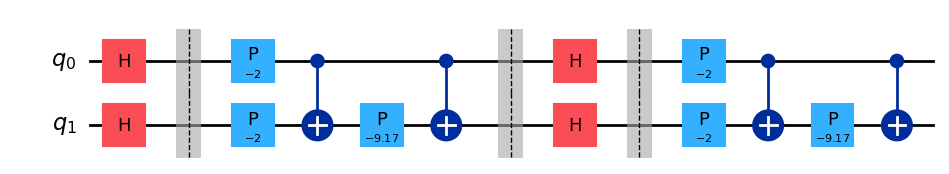

In [11]:
feature_map_custom([1.0, 1.0]).decompose("U_phi").draw(output='mpl')

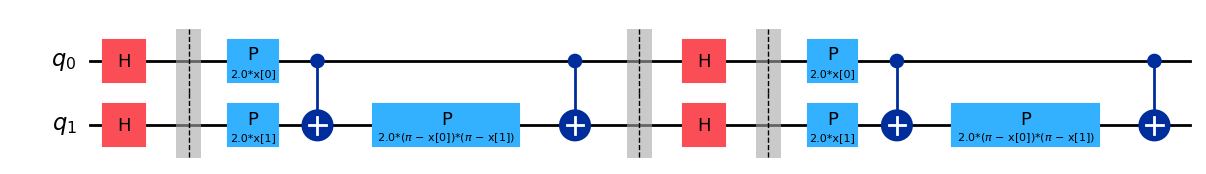

In [7]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, insert_barriers=True, entanglement = 'full')
# default value 'full' indicates a complete connectivity graph of n(n-1)/2 interactions
feature_map.decompose().draw(output='mpl')

In [8]:
for gate in feature_map.data:
    print('\ngate name:', gate[0].name)
    print('qubit(s) acted on:', gate[1])
    print('other paramters (such as angles):', gate[0].params)


gate name: ZZFeatureMap
qubit(s) acted on: [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]
other paramters (such as angles): [ParameterVectorElement(x[0]), ParameterVectorElement(x[1])]
